In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import data
df = pd.read_csv("medical_examination.csv")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) **2 ) >25
df.head()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False


In [8]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'] >1
df['gluc'] = df['gluc'] >1
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,False,False,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,True,False,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,True,False,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,False,False,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,False,False,0,0,0,0,False


In [9]:
# Draw Categorical Plot

#def draw_cat_plot():

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

df_cat = pd.melt(df, id_vars=['cardio'], value_vars = ['cholesterol','gluc','smoke','alco','active','overweight'])

df_cat = pd.DataFrame(df_cat.groupby(['cardio','variable','value'])['value'].count()).rename(columns={'value':'total'}).reset_index()

df_cat

,cardio,variable,value,total
0,0,active,False,6378
1,0,active,True,28643
2,0,alco,False,33080
3,0,alco,True,1941
4,0,cholesterol,False,29330
5,0,cholesterol,True,5691
6,0,gluc,False,30894
7,0,gluc,True,4127
8,0,overweight,False,15915
9,0,overweight,True,19106


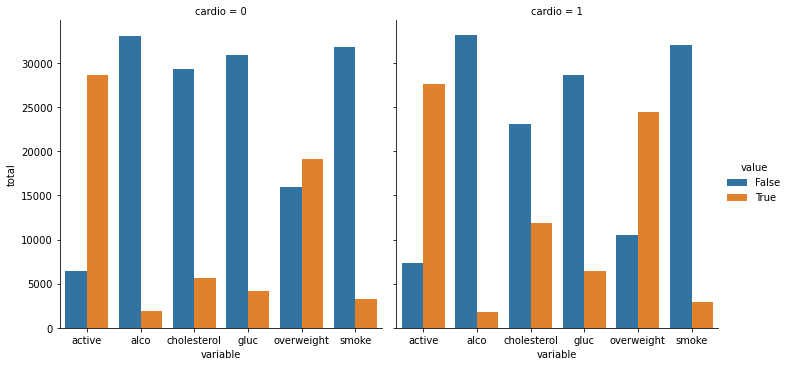

In [10]:
# Draw the catplot with 'sns.catplot()'
g = sns.catplot(x='variable',y='total',kind='bar',hue='value',col='cardio',data=df_cat)

In [11]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,False,False,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,True,False,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,True,False,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,False,False,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,False,False,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,False,False,0,0,1,1,False
69994,99992,21074,1,165,80.0,150,80,False,False,0,0,1,1,True
69995,99993,19240,2,168,76.0,120,80,False,False,1,0,1,0,True
69998,99998,22431,1,163,72.0,135,80,False,True,0,0,0,1,True


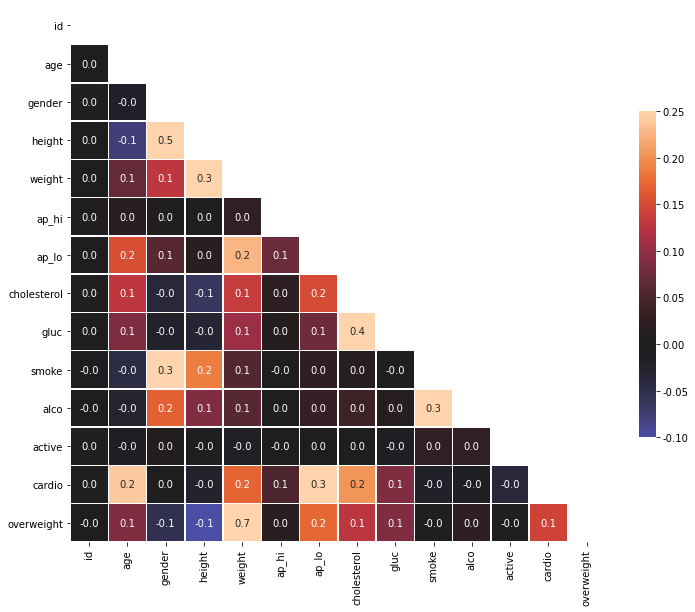

In [12]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(corr, linewidths=.5, annot=True, fmt='.1f', mask=mask, square=True, center=0,      vmin=-0.1, vmax=0.25, cbar_kws={'shrink': .5, 'format': '%.2f'})